In [1]:

%load_ext autoreload
%autoreload 2
    
import pyleoclim as pyleo
import matplotlib.pyplot as plt
import pandas as pd
import textalloc as ta


/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(


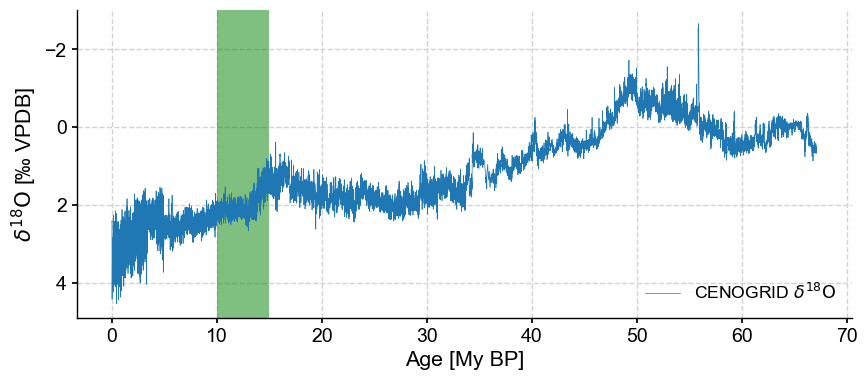

In [2]:
ts_18 = pyleo.utils.load_dataset('cenogrid_d18O')
fig, ax = ts_18.plot(invert_yaxis=True,linewidth=0.5)
ax.axvspan(10, 15, facecolor='g', alpha=0.5)

In [3]:
ts_18 = pyleo.utils.load_dataset('cenogrid_d18O')
fig, ax = ts_18.plot(invert_yaxis=True,linewidth=0.5)

ts_13 = pyleo.utils.load_dataset('cenogrid_d13C')
ms = pyleo.MultipleSeries([ts_18, ts_13], label='Cenogrid', time_unit='ma BP')
# note: should there be "invert_yaxis" behavior?

/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(


In [83]:
def make_phantom_ax(_ax):
    _ax.spines['left'].set_visible(False)
    _ax.spines['right'].set_visible(False)
    _ax.spines['bottom'].set_visible(False)
    _ax.set_yticks([])
    # _ax.set_xlim(xlim)
    _ax.tick_params(axis='x', which='both', length=0)
    _ax.set_xlabel('')
    _ax.set_ylabel('')
    _ax.grid(False)
    
    _ax.set_xticklabels([])
    _ax.set_yticklabels([])
    return _ax

dict

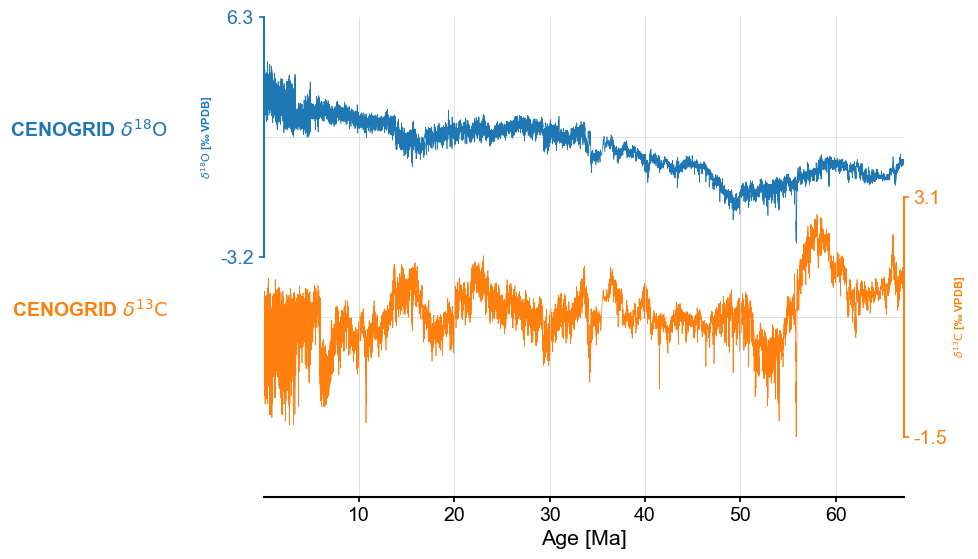

In [70]:
fig, ax = ms.stackplot(linewidth=0.5, fill_between_alpha=0)
type(ax)

/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(
/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(


<Axes: >

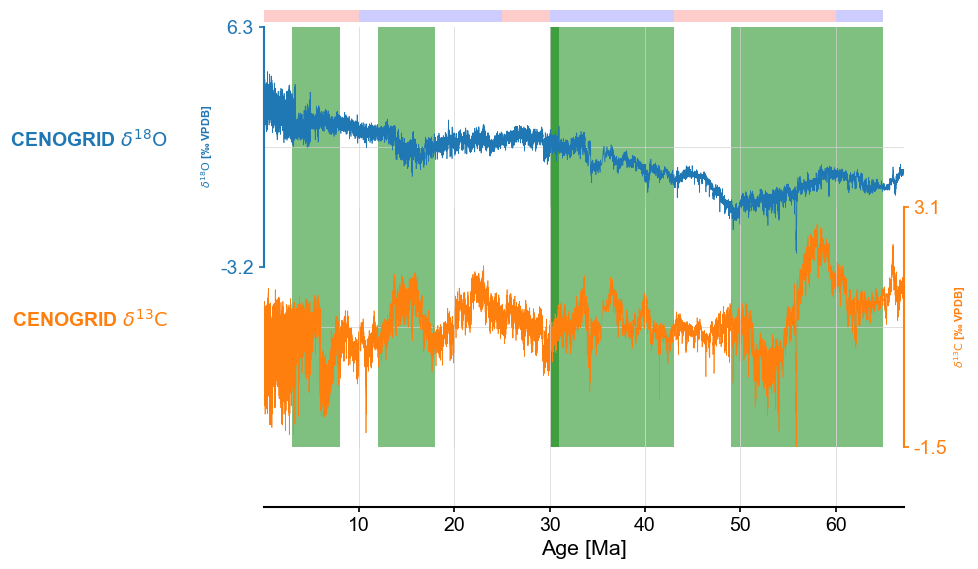

In [113]:
ts_18 = pyleo.utils.load_dataset('cenogrid_d18O')
ts_13 = pyleo.utils.load_dataset('cenogrid_d13C')
ms = pyleo.MultipleSeries([ts_18, ts_13], label='Cenogrid', time_unit='ma BP')

fig, ax = ms.stackplot(linewidth=0.5, fill_between_alpha=0)

def make_annotation_ax(fig, ax, loc='overlay', 
                       ax_name = 'highlighted_intervals', 
                       height=.025, v_offset=0,
                       width = None, h_offset=0,
                       zorder=-1):
    if type(ax) !=dict:
        ax= {0:ax}
        
    ll = []
    ur = []
    keys_list = [key for key in ax.keys() if type(key)==int]
    keys_list.sort()
    
    for ax_key in keys_list:
        bbox_coords =ax[ax_key].get_position()  
        ll.append(bbox_coords._points[0].tolist())
        ur.append(bbox_coords._points[1].tolist())
    
    b = min([_ll[1] for _ll in ll])
    l = min([_ll[0] for _ll in ll])
    u = max([_ur[1] for _ur in ur])
    r = max([_ur[0] for _ur in ur]) 

    if width is None:
        width = r-l
    if loc == 'overlay':
        height = u-b
        b = b+v_offset
        l = l+h_offset
    if loc == 'above':
        b = u+v_offset
        l = l+h_offset
    if loc == 'below':
        b = l-height-v_offset
        l = l+h_offset

    ax[ax_name] = fig.add_axes([l, b, width, height],
                                                 **{'zorder':zorder})
    ax[ax_name].set_xlim(ax[ax_key].get_xlim())
    ax[ax_name] =make_phantom_ax(ax[ax_name])
    return ax

def hightlight_intervals(ax, intervals, color='g', alpha=.3):

    if isinstance(intervals[0], list) is False:
    # if type(intervals[0]) != list:
        intervals = [intervals]
    for ik, _ts in enumerate(intervals):
        if isinstance(color, list) is True:
            c = color[ik]
        else:
            c = color
        if isinstance(alpha, list) is True:
            a = alpha[ik]
        else:
            a = alpha

        ax.axvspan(_ts[0], _ts[1], facecolor=c, alpha=a)
    # if type(intervals[0])!=list:
    #     intervals = [intervals]
    # for ik, _ts in enumerate(intervals):
    #     if type(color)==list:
    #         c = color[ik]
    #     else:
    #         c=color
    #     if type(alpha)==list:
    #         a=alpha[ik]
    #     else:
    #         a = alpha
        
    #     ax.axvspan(_ts[0], _ts[1], facecolor=c, alpha=a)
        
    return ax
    
ax=make_annotation_ax(fig, ax, ax_name = 'highlighted_intervals', zorder=-1)
geo_ts = [[3, 8], [12, 18], [30, 31], [40,43], [49, 60], [60, 65]]
hightlight_intervals(ax['highlighted_intervals'], geo_ts, 
                     color='g', alpha=.5)

ax=make_annotation_ax(fig, ax, 
                      ax_name = 'timescale', loc='above', 
                      v_offset=.01,
                      height=.025, zorder=-1.5)

geo_ts = [[0, 10], [10, 25], [25, 30], [30,43], [43, 60], [60, 65]]
colors = ['r' if ik%2 ==0 else 'b' for ik, _ts in enumerate(geo_ts)]

hightlight_intervals(ax['timescale'], geo_ts, 
                     color=colors, alpha=.2)


KeyError: 'subplots_canvas'

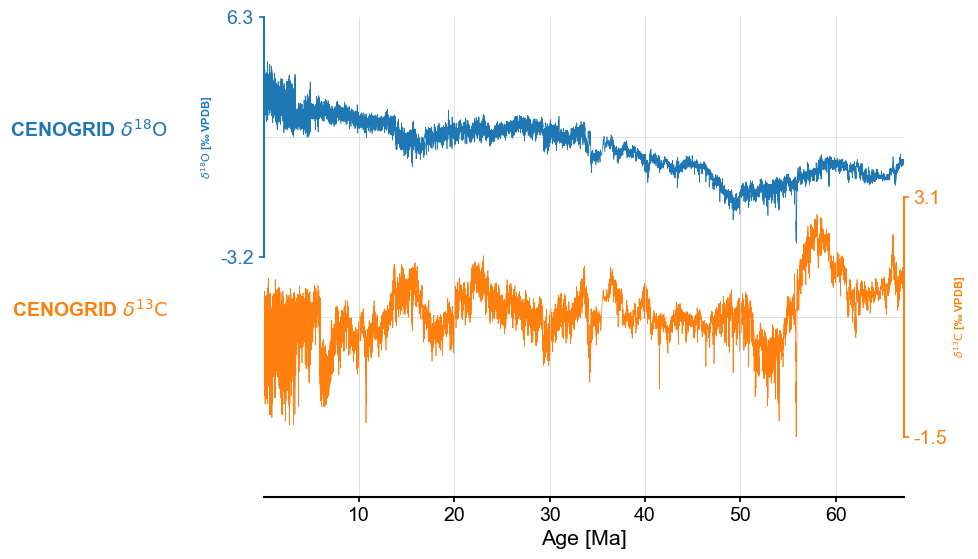

In [106]:
fig, ax = ms.stackplot(linewidth=0.5, fill_between_alpha=0)

def highlight_intervals(ax, intervals):
    if type(ax) == dict:
        if 'subplots_canvas' in ax:
            _ax = a
ax['subplots_canvas'].axvspan(10, 17, facecolor='g', alpha=0.5)

def add_geo_timescale(fig, ax, timescale_height = .025, offset=.01):
# bbox_coords =ax['subplots_canvas'].get_position()
    if type(ax) == dict:
        _ax = ax['subplots_canvas']
    else:
        _ax = ax
        ax = {'ax':ax}
    bbox_coords =ax.get_position()
    
    ll_sp = bbox_coords._points[0]
    ur_sp = bbox_coords._points[1]
    
    timescale_l = ll_sp[0]
    timescale_b = ur_sp[1]+offset
    timescale_width = ur_sp[0]-ll_sp[0]

ax['timescale'] = fig.add_axes([timescale_l, timescale_b, 
                                      timescale_width, timescale_height], 
                               **{'zorder':-1})
ax['timescale'] = make_phantom_ax(ax['timescale'])

geo_ts = [[10,0], [10, 25], [25, 30], [30,43], [43, 60], [60, 65]]
for ik, _ts in enumerate(geo_ts):
    if ik%2 ==0:
        c = 'r'
    else:
        c = 'b'
    ax['timescale'].axvspan(_ts[0], _ts[1], facecolor=c, alpha=0.5)


# 

In [639]:
# MIS_intervals = [[]]
# Read data from the URL
MIS_df = pd.read_csv('https://lorraine-lisiecki.com/LR04_MISboundaries.txt', sep='\t', nrows=25, skiprows=1)

# Selecting the relevant columns
cols = MIS_df.columns
MIS_bounds = MIS_df[[cols[0]]].replace(np.nan, 0, inplace=False).astype(float) + MIS_df[[cols[1]]].replace(np.nan, 0, inplace=False).astype(float).values
MIS_bounds.reset_index(inplace=True)
MIS_bounds.columns = ['boundary', 'Age']

# Filtering out rows with 'peak' in the boundary column
filtered_df = MIS_bounds[~MIS_bounds['boundary'].str.contains('peak', na=False)]

# Prepending a 0 to the Age column for the first interval
filtered_ages = [0] + filtered_df['Age'].tolist()

# Creating intervals
intervals = [[start, end] for start, end in zip(filtered_ages, filtered_ages[1:])]

# Creating interval labels
interval_labels = [f"{i+1}" for i in range(len(intervals))]

peaks = MIS_bounds[MIS_bounds['boundary'].str.contains('peak', na=False)]
peak_labels = ['5{}'.format('abcdefg'[ik]) for ik in range(len(peaks['Age']))]
peak_locs = peaks['Age']

# # Calculate the absolute year difference
peak_idx = [pd.Series(abs(LR04.time - specified_year)).idxmin() for specified_year in peak_locs]
peak_values = [LR04.value[idx] for idx in peak_idx]

/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(


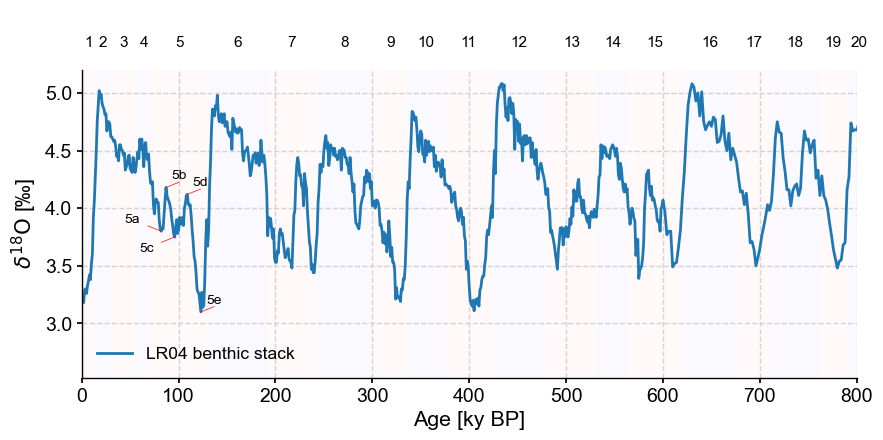

In [655]:
LR04 = pyleo.utils.load_dataset('LR04')
fig, ax = LR04.plot(xlim=[0,800], invert_yaxis=False)
ax.set_facecolor((1, 1, 1, 0))

ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'highlighted_intervals', loc='overlay',zorder=-2)#, v_offset=.0150,)

colors = ['r' if ik%2 ==0 else 'b' for ik, _ts in enumerate(intervals)]

ax['highlighted_intervals'] = pyleo.utils.plotting.hightlight_intervals(ax['highlighted_intervals'], intervals,
         color=colors, alpha=.0251)

height = .1
ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'annotation_intervals', 
                                           zorder=0, v_offset=.050,
                                           height=height, loc='above')
ylims=[0,1]
ax['annotation_intervals'].set_ylim(ylims)

x_locs = [np.mean(interval) for interval in intervals]
anotate_locations(ax, x_locs, interval_labels, loc='below',ax_name='annotation_intervals' ,fontsize=11, levels=None, 
                  scaler=-.2, min_offset=1.2)

intervals_x = [[start, end] for start, end in zip(LR04.time, LR04.time[1:])]
intervals_y = [[start, end] for start, end in zip(LR04.value, LR04.value[1:])]

margin=.005
min_distance=margin+.01205
max_distance = min_distance+.01
ta.allocate_text(fig,ax[0],
                 peak_locs,peak_values,
                peak_labels,
            x_scatter=LR04.time, y_scatter=LR04.value,
            x_lines=intervals_x, y_lines=intervals_y,
            max_distance=max_distance,#0.842,
            min_distance=min_distance, #0.04,
            margin=margin, #0.02839,
            linewidth=0.5,
                 draw_all=True,
            nbr_candidates=400, 
                 **dict(horizontalalignment="center", va='bottom')
                )
                 
# ts_13 = pyleo.utils.load_dataset('cenogrid_d13C')
# ms = pyleo.MultipleSeries([ts_18, ts_13], label='Cenogrid', time_unit='ma BP')

/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(
/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(


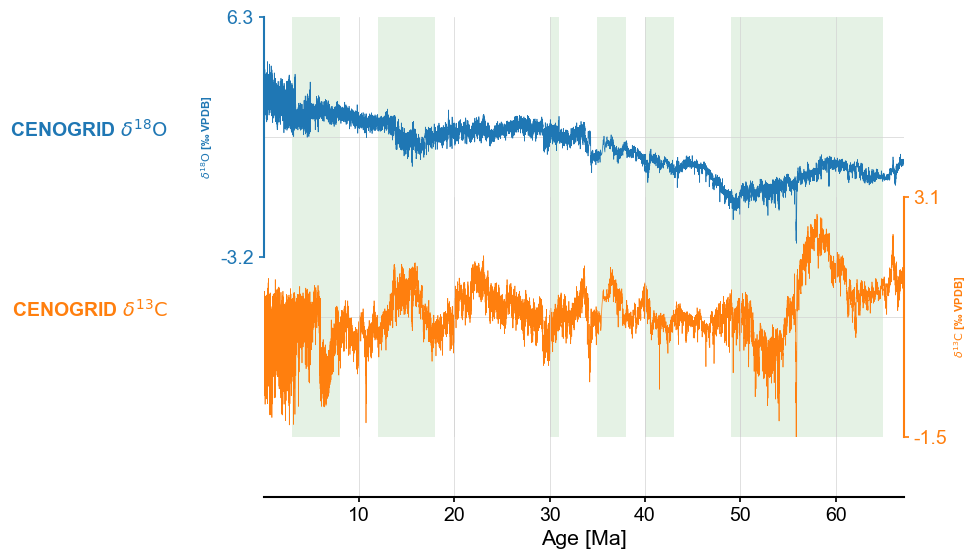

In [638]:
import pyleoclim as pyleo
import numpy as np
ts_18 = pyleo.utils.load_dataset('cenogrid_d18O')
ts_13 = pyleo.utils.load_dataset('cenogrid_d13C')
ms = pyleo.MultipleSeries([ts_18, ts_13], label='Cenogrid', time_unit='ma BP')

fig, ax = ms.stackplot(linewidth=0.5, fill_between_alpha=0)

ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'highlighted_intervals', zorder=-1)
height = .1
ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'annotation_intervals', 
                                           zorder=-2, v_offset=0,
                                           height=height, loc='below')

intervals = [[3, 8], [12, 18], [30, 31], [35,38], [40,43], [49, 60], [60, 65]]
labels = ['MIS1', 'MIS2', 'MIS3', 'Bolling-Alerod', 'MIS4', 'MIS5', 'Y-D']
ax['highlighted_intervals'] = pyleo.utils.plotting.hightlight_intervals(ax['highlighted_intervals'], intervals,
         color='g', alpha=.1)


x_locs = [np.mean(interval) for interval in intervals]
ylims = [-1,0]

y_locs = [ylims[1] for x_loc in x_locs]

ax['annotation_intervals'].set_ylim(ylims)
# x_locs = np.unique(np.array(intervals).ravel())

# xdisplay, ydisplay = ax.transData.transform((xdata, ydata))

bbox = dict(boxstyle="round", fc="1")
arrowprops = dict(
    arrowstyle="-",
    # connectionstyle="angle,angleA=0,angleB=90,rad=10"
)

offset = 3
min_offset = 1.2
slot1 = 1.2
slot2 = 3
slot = slot1
x1 = 0
x2 = 0
scaler=-.2
size = 11

def anotate_locations(ax, x_locs, labels, loc='above', ax_name='annotation_intervals' ,fontsize=11, levels=None, scaler=-.2, min_offset=1.2):
    ylims = ax[ax_name].get_ylim()#[-1,0]
    if loc=='above':
        y_locs = [ylims[1] for x_loc in x_locs]
        dir_sign = -1
    else:
        y_locs = [ylims[0] for x_loc in x_locs]
        dir_sign=1


    if levels is None:
        levels = np.array([.2, .55])
        tracks = [0]*len(levels)

    levels = levels*5
    slot = levels[0]
    for ik, loc in enumerate(x_locs):
        s = labels[ik]#str(int(loc))
        ann = ax[ax_name].text(loc, scaler*slot, s, size=size)
        box = ax[ax_name].transData.inverted().transform(
                ann.get_tightbbox(fig.canvas.get_renderer())
            )
        w, h = box[1][0] - box[0][0], box[1][1] - box[0][1]
        
        if tracks[0]+.5*w > loc:
            # print(x1, loc, x2)
            slot=levels[1]
            tracks[1]=loc+w
            # print(x1, loc, x2)
        else:
            slot = levels[0]
            tracks[0]=loc+w
            # print(x1, loc, x2, w)
        if np.abs(-h*slot)> np.abs(min_offset*h):
            ax[ax_name].annotate(
            s,(loc, y_locs[ik]),
            (loc, dir_sign*h*slot),
            va='top', ha='center',
            # xytext=(-2*offset, offset), textcoords='offset points',
            # bbox=bbox, 
            arrowprops=arrowprops, 
            **{'size':size}
        )
        else:
            ax[ax_name].text(loc, dir_sign*h*slot, s, size=size, va='top', ha='center')
        ann.remove()
    


# ys = [.7, .5, .6, .6, .6, .4, .7, .8, .5, .8, .5, .5, .7]
# # ylims = ax['annotation_intervals'].get_ylim()#legend()
# x_locs = np.unique(np.array(intervals).ravel())
# ylims = [-1,0]
# ax['annotation_intervals'].set_ylim(ylims)
# y_locs = np.array([ylims[1]-.05 for x_loc in x_locs])
# labels = [str(int(x_loc)) for x_loc in x_locs]

# margin=.2
# min_distance=margin+.015
# max_distance = min_distance+.01
# import textalloc as ta

# ta.allocate_text(fig,ax['annotation_intervals'],
#                  x_locs,y_locs-.01,
#             labels,
#             # x_scatter=x_locs, y_scatter=y_locs,
#             max_distance=max_distance,#0.842,
#             min_distance=min_distance, #0.04,
#             margin=margin, #0.02839,
#             linewidth=0.5,
#                  draw_all=True,
#             nbr_candidates=400, 
#                  # bbox=dict(boxstyle="round,pad=0", fill=False, alpha=0, fc='w', ec="w", lw=0.5), 
#                  **dict(horizontalalignment="center", va='bottom')
#                  # **dict(transform=ax['annotation_intervals'].transData)
#                 )
# ax['annotation_intervals'].patch.set_linewidth(5)
# ax['annotation_intervals'].patch.set_edgecolor('pink')


# ta.allocate_text(fig,ax['annotation_intervals'],
#                  x_locs,y_locs+.1,
#                 labels,
#                  x_scatter=scatter_xlocs, y_scatter=scatter_ylocs,
                 
#                 #  x_lines=[np.array([xx,xx]) for xx in list(x_locs_middle)],
#                 # y_lines=[np.array([ylims[0],ylims[1]]) for yy in list(x_locs_middle)],
                 
#                 # x_lines=[np.array([xx,xx]) for xx in list(x_locs)],
#                 # y_lines=[[ylims[1], ylims for yy in y_locs],#np.array([0,yy]) for yy in list(y_locs)], 
#                 textsize=11,
#                  scatter_sizes=[13 for ik in range(len(scatter_ylocs))],
#                  draw_all=True,
#                 margin=margin,#.0051,
#                  min_distance=min_distance,
#                 max_distance=max_distance,
#                 linewidth=1,
#                 # nbr_candidates=100,
#                 textcolor="k", 
#                 **{'ha':'left'}
#                 )

/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(
/Users/jlanders/PycharmProjects/Pyleoclim_util/pyleoclim/utils/datasets.py:160: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release, this will be changed to False.
  ts=pyleo.Series(


5.5
15.0
30.5
36.5
33.21285503574219 36.5 0
41.5
54.5
62.5


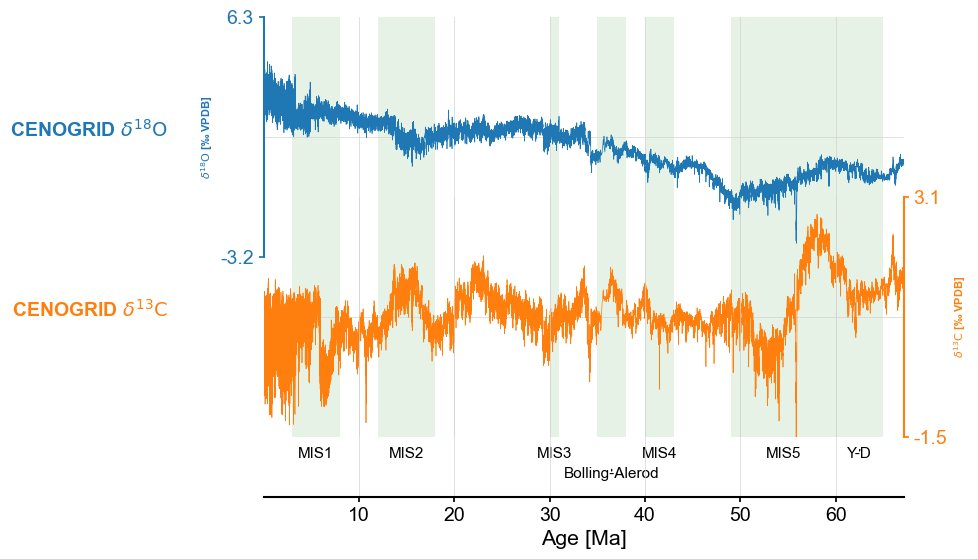

In [461]:
import pyleoclim as pyleo
import numpy as np
ts_18 = pyleo.utils.load_dataset('cenogrid_d18O')
ts_13 = pyleo.utils.load_dataset('cenogrid_d13C')
ms = pyleo.MultipleSeries([ts_18, ts_13], label='Cenogrid', time_unit='ma BP')

fig, ax = ms.stackplot(linewidth=0.5, fill_between_alpha=0)

ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'highlighted_intervals', zorder=-1)
height = .1
ax=pyleo.utils.plotting.make_annotation_ax(fig, ax, ax_name = 'annotation_intervals', 
                                           zorder=-2, v_offset=0,
                                           height=height, loc='below')

intervals = [[3, 8], [12, 18], [30, 31], [35,38], [40,43], [49, 60], [60, 65]]
labels = ['MIS1', 'MIS2', 'MIS3', 'Bolling-Alerod', 'MIS4', 'MIS5', 'Y-D']
ax['highlighted_intervals'] = pyleo.utils.plotting.hightlight_intervals(ax['highlighted_intervals'], intervals,
         color='g', alpha=.1)

x_locs = [np.mean(interval) for interval in intervals]
ylims = [-1,0]
ax['annotation_intervals'].set_ylim(ylims)
# x_locs = np.unique(np.array(intervals).ravel())

# xdata, ydata = 5, 0
# # xdisplay, ydisplay = ax.transData.transform((xdata, ydata))

# bbox = dict(boxstyle="round", fc="1")
# arrowprops = dict(
#     arrowstyle="-",
#     # connectionstyle="angle,angleA=0,angleB=90,rad=10"
# )

# offset = 3
# slot = 1
# x1 = 0
# x2 = 0
# scaler=-.2
# for ik, loc in enumerate(x_locs):
#     print(loc)
#     s = labels[ik]#str(int(loc))
#     ann = ax['annotation_intervals'].text(loc, scaler*slot, s, size=8)
#     box = ax['annotation_intervals'].transData.inverted().transform(
#             ann.get_tightbbox(fig.canvas.get_renderer())
#         )
#     w, h = box[1][0] - box[0][0], box[1][1] - box[0][1]
    
#     if x1+.5*w > loc:
#         print(x1, loc, x2)
#         slot=3
#         x2=loc+w
#         # print(x1, loc, x2)
#     else:
#         slot = 1
#         x1=loc+w
#         # print(x1, loc, x2, w)
#     ax['annotation_intervals'].annotate(
#         s,
#         (loc, -h*slot),
#         va='top', ha='center',
#         # xytext=(-2*offset, offset), textcoords='offset points',
#         # bbox=bbox, 
#         arrowprops=arrowprops, 
#         **{'size':11}
#     )
#     ann.remove()
    


ys = [.7, .5, .6, .6, .6, .4, .7, .8, .5, .8, .5, .5, .7]
# ylims = ax['annotation_intervals'].get_ylim()#legend()
x_locs = np.unique(np.array(intervals).ravel())
ylims = [-1,0]
ax['annotation_intervals'].set_ylim(ylims)
y_locs = np.array([ylims[1]-.05 for x_loc in x_locs])
labels = [str(int(x_loc)) for x_loc in x_locs]
_xdisplay = []
_ydisplay = []
for ik in range(len(x_locs)):
xdisplay, ydisplay = ax.transData.transform((xdata, ydata))
margin=.2
min_distance=margin+.015
max_distance = min_distance+.01
import textalloc as ta

ta.allocate_text(fig,ax['annotation_intervals'],
                 x_locs,y_locs-.01,
            labels,
            # x_scatter=x_locs, y_scatter=y_locs,
            max_distance=max_distance,#0.842,
            min_distance=min_distance, #0.04,
            margin=margin, #0.02839,
            linewidth=0.5,
                 draw_all=True,
            nbr_candidates=400, 
                 # bbox=dict(boxstyle="round,pad=0", fill=False, alpha=0, fc='w', ec="w", lw=0.5), 
                 **dict(horizontalalignment="center", va='bottom', xycoords='figure pixels',)
                 # **dict(transform=ax['annotation_intervals'].transData)
                )
ax['annotation_intervals'].patch.set_linewidth(5)
ax['annotation_intervals'].patch.set_edgecolor('pink')


# ta.allocate_text(fig,ax['annotation_intervals'],
#                  x_locs,y_locs+.1,
#                 labels,
#                  x_scatter=scatter_xlocs, y_scatter=scatter_ylocs,
                 
#                 #  x_lines=[np.array([xx,xx]) for xx in list(x_locs_middle)],
#                 # y_lines=[np.array([ylims[0],ylims[1]]) for yy in list(x_locs_middle)],
                 
#                 # x_lines=[np.array([xx,xx]) for xx in list(x_locs)],
#                 # y_lines=[[ylims[1], ylims for yy in y_locs],#np.array([0,yy]) for yy in list(y_locs)], 
#                 textsize=11,
#                  scatter_sizes=[13 for ik in range(len(scatter_ylocs))],
#                  draw_all=True,
#                 margin=margin,#.0051,
#                  min_distance=min_distance,
#                 max_distance=max_distance,
#                 linewidth=1,
#                 # nbr_candidates=100,
#                 textcolor="k", 
#                 **{'ha':'left'}
#                 )

# ylims

ax['annotation_intervals'].get_ylim()

In [4]:
import textalloc as ta
import numpy as np
import matplotlib.pyplot as plt

x_line = np.array([0.0, 0.03192317, 0.04101177, 0.26085659, 0.40261173, 0.42142198, 0.87160195, 1.00349979])
y_line = np.array([0. , 0.2, 0.2, 0.4, 0.8, 0.6, 1. , 1. ])
text_list = ['0', '25', '50', '75', '100', '125', '150', '250']
np.random.seed(0)
x, y = np.random.random((2,100))

fig,ax = plt.subplots(dpi=100)
ax.plot(x_line,y_line,color="black")
ax.scatter(x,y,c="b")
ta.allocate_text(fig,ax,x_line,y_line,
                text_list,
                x_scatter=x, y_scatter=y,
                x_lines=[x_line], y_lines=[y_line])
plt.show()

{'_stale': True,
 'stale_callback': <function matplotlib.figure._stale_figure_callback(self, val)>,
 '_axes': <Axes: >,
 'figure': <Figure size 640x480 with 4 Axes>,
 '_transform': None,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x177a3f1d0>,
 '_remove_method': <bound method FigureBase.delaxes of <Figure size 640x480 with 4 Axes>>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 '_position': Bbox([[0.0, 0.25], [1.0, 1.125]]),
 '_originalPosition': Bbox([[0.0, 0.25], [1.0, 1.125]]),
 '_aspect': 'auto',
 '_adjustable': 'box',
 '_anchor': 'C',
 '_stale_viewlims': {'x': False, 'y': False},
 '_sharex': None,
 '_sharey': None,
 'bbox': <matplotlib.tr